<a href="https://colab.research.google.com/github/jpcanamaque/energy-use-per-person/blob/master/Assignment_DataVisualizationExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Visualization Exercise
## Author: Johnroe Paulo Canamaque

In [1]:
# Necessary module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQEQJCZIgvpTDjSYeETLlQy3PvGRzloGQHuHCQDFoKqsffLc9fHK_J_zu0QaIp53o05kKSK7JRuXWS2/pub?gid=2053699867&single=true&output=csv')
df

,entity,Code,Year,Primary energy consumption per capita (kWh/person)
0,Afghanistan,AFG,1980,623.92865
1,Afghanistan,AFG,1981,786.83690
2,Afghanistan,AFG,1982,926.65125
3,Afghanistan,AFG,1983,1149.19590
4,Afghanistan,AFG,1984,1121.57290
...,...,...,...,...
10597,Zimbabwe,ZWE,2017,3068.01150
10598,Zimbabwe,ZWE,2018,3441.98580
10599,Zimbabwe,ZWE,2019,3003.65530
10600,Zimbabwe,ZWE,2020,2680.13180


## Data Cleaning and EDA

In [3]:
# Rename long named column to simplify usage of data
renamed_cols = {
    'Primary energy consumption per capita (kWh/person)' : 'energy_per_capita'
}
df.rename(columns= renamed_cols, inplace=True)

In [4]:
# Quick EDA on the data

# Checking information of the data
df.info()

# Show nulls
print("======== NULL check =========")
display(df.isna().sum())

print("======== Duplicate check =========")
display('No duplicates' if df.duplicated().sum() == 0 else df[df.duplicated()] )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10602 entries, 0 to 10601
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   entity             10602 non-null  object 
 1   Code               9980 non-null   object 
 2   Year               10602 non-null  int64  
 3   energy_per_capita  10602 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 331.4+ KB
======== NULL check =========


entity                 0
Code                 622
Year                   0
energy_per_capita      0
dtype: int64

======== Duplicate check =========


'No duplicates'

In [5]:
# There are observed null values in the Code column. View the column
df[df['Code'].isna()]['entity'].unique()

array(['Africa', 'Asia', 'Europe', 'European Union (27)',
       'High-income countries', 'Low-income countries',
       'Lower-middle-income countries', 'North America', 'Oceania',
       'South America', 'Upper-middle-income countries'], dtype=object)

In [6]:
# As it appears, the value that have null values are continents and group of countries
# For this case, we may omit these groups in order have a data that is per country

# Remove null values, then execute null check
clean_df = df.dropna()
display(clean_df.isna().sum())

# Display cleaned data
display(clean_df)

entity               0
Code                 0
Year                 0
energy_per_capita    0
dtype: int64

,entity,Code,Year,energy_per_capita
0,Afghanistan,AFG,1980,623.92865
1,Afghanistan,AFG,1981,786.83690
2,Afghanistan,AFG,1982,926.65125
3,Afghanistan,AFG,1983,1149.19590
4,Afghanistan,AFG,1984,1121.57290
...,...,...,...,...
10597,Zimbabwe,ZWE,2017,3068.01150
10598,Zimbabwe,ZWE,2018,3441.98580
10599,Zimbabwe,ZWE,2019,3003.65530
10600,Zimbabwe,ZWE,2020,2680.13180


## Data Visualization

In [7]:
# We will create a bar chart of the average energy per capita per country
# To do this, we need to group the data by entity and get average of the energy per capita

country_energy_df = clean_df.groupby(['entity', 'Code'])[['energy_per_capita']].mean()
country_energy_df = country_energy_df.reset_index(['entity', 'Code'])
country_energy_df.sort_values(by=['energy_per_capita'], ascending=False, inplace=True)
display(country_energy_df)

,entity,Code,energy_per_capita
211,United States Virgin Islands,VIR,215836.971857
138,Netherlands Antilles,ANT,194589.990000
160,Qatar,QAT,182211.835155
13,Bahrain,BHR,146821.782357
208,United Arab Emirates,ARE,123871.247312
...,...,...,...
36,Central African Republic,CAF,365.526785
30,Burundi,BDI,228.677199
37,Chad,TCD,199.164770
204,Tuvalu,TUV,0.000000


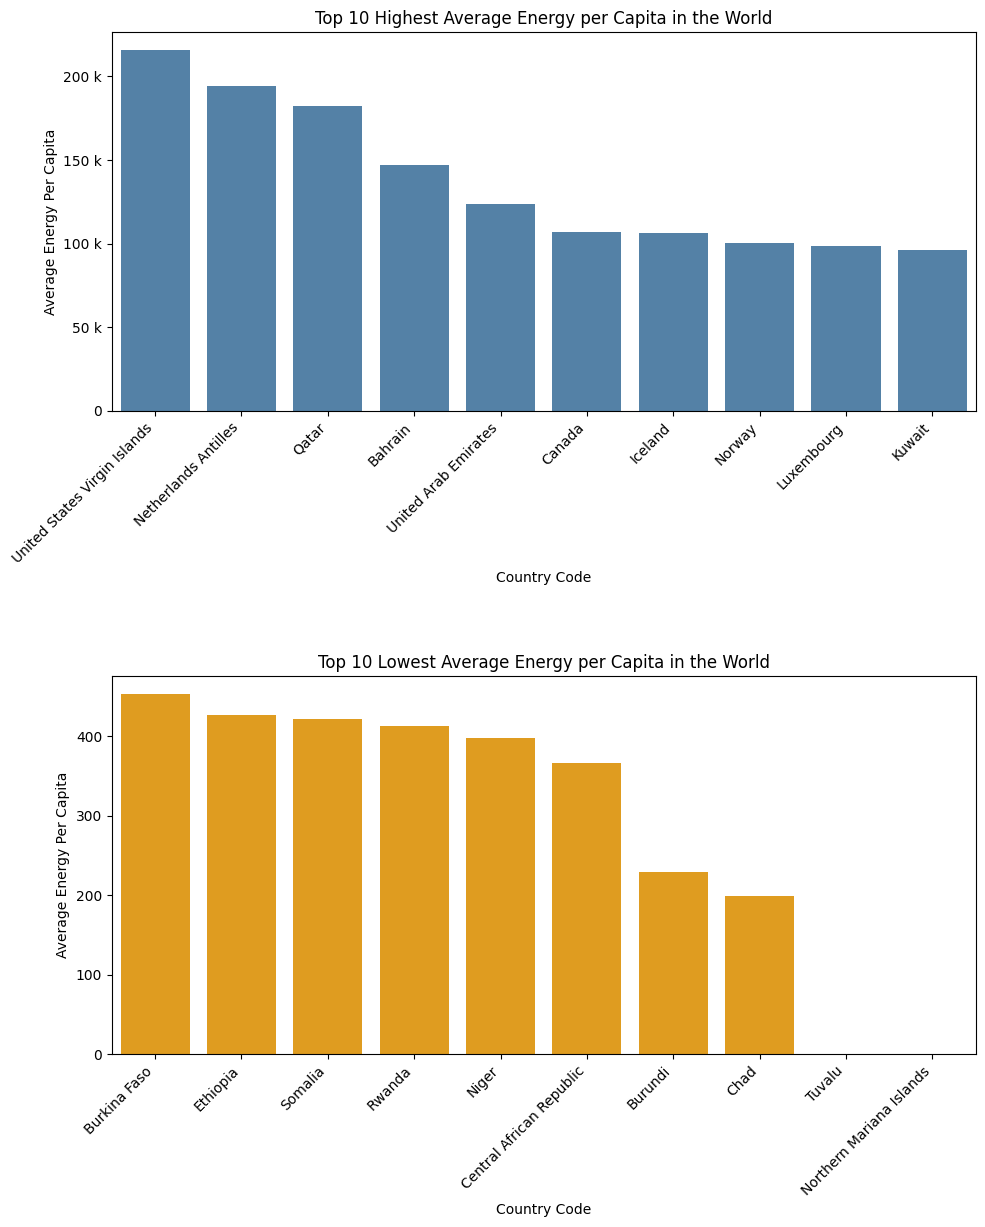

In [8]:
# Drawing the bar charts here


fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# For the top 10 highest
sns.barplot(data = country_energy_df.head(10), ax=ax[0], x='entity', y='energy_per_capita', color='steelblue');
# Settinng the title
ax[0].set_title("Top 10 Highest Average Energy per Capita in the World")

# Setting the x axis
ax[0].set_xlabel("Country Code")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45,  horizontalalignment='right')

# Setting the y axis
ax[0].set_ylabel("Average Energy Per Capita");
ax[0].yaxis.set_major_formatter(ticker.EngFormatter())


# For the top 10 lowest
sns.barplot(data = country_energy_df.tail(10), ax=ax[1], x='entity', y='energy_per_capita', color='orange');
# Settinng the title
ax[1].set_title("Top 10 Lowest Average Energy per Capita in the World")

# Setting the x axis
ax[1].set_xlabel("Country Code")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45,  horizontalalignment='right')

# Setting the y axis
ax[1].set_ylabel("Average Energy Per Capita");
ax[1].yaxis.set_major_formatter(ticker.EngFormatter())

plt.tight_layout()
plt.subplots_adjust(wspace = 0.2, hspace = 0.7,top = 1.5);

In [9]:
# For the 2nd graph, will create a line chart of the yearly energy per capita per country in SEA
# To do this, we need to select the data based on the countries in SEA and get plot them in a line graph

sea_countries = ['Brunei', 'Myanmar', 'Cambodia', 'East Timor', 'Indonesia', 'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam', 'Sri Lanka', ]
sea_df = clean_df[clean_df['entity'].str.contains('|'.join(sea_countries))]
sea_df

,entity,Code,Year,energy_per_capita
1318,Brunei,BRN,1980,128381.540
1319,Brunei,BRN,1981,128519.220
1320,Brunei,BRN,1982,135640.420
1321,Brunei,BRN,1983,103056.600
1322,Brunei,BRN,1984,88017.860
...,...,...,...,...
10359,Vietnam,VNM,2018,11443.453
10360,Vietnam,VNM,2019,12585.570
10361,Vietnam,VNM,2020,12467.438
10362,Vietnam,VNM,2021,12375.912


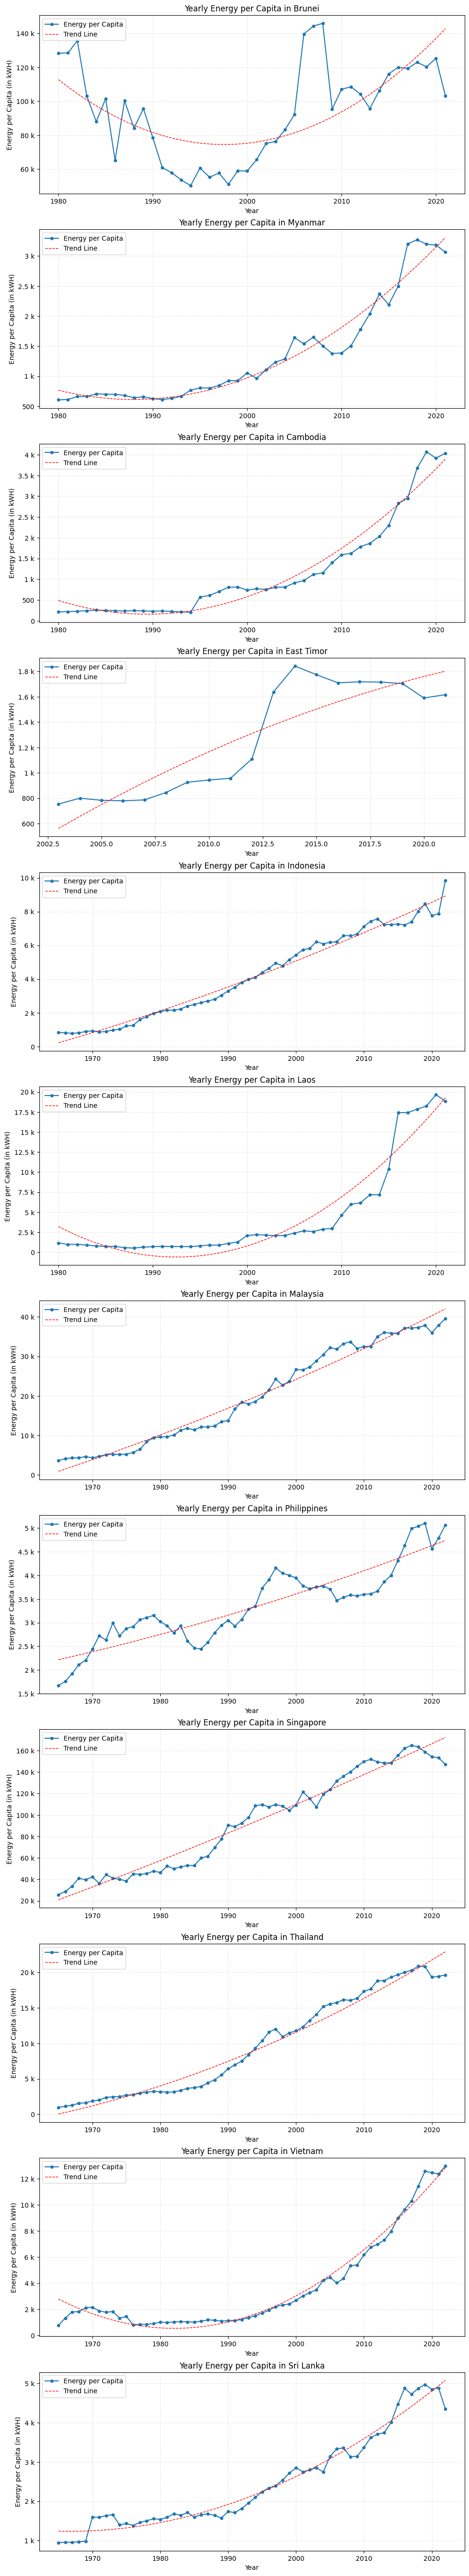

In [10]:
# Drawing the line graph per country

# Setting the subplot and the theme
sea_len = len(sea_countries)
fig, ax = plt.subplots(sea_len, 1, figsize=(10, 3*sea_len))
plt.style.use('fast')

# Iterating all countries then plot in the subplot
for idx, country in enumerate(sea_countries):
  # Selects the data frame to be used
  data_used = sea_df[sea_df['entity'] == country]

  # For trend line computation
  z = np.polyfit(data_used['Year'], data_used['energy_per_capita'], 2)
  p = np.poly1d(z)

  # Actual plotting of the main data
  ax[idx].plot(data_used['Year'], data_used['energy_per_capita'], marker='o', markersize=4, label='Energy per Capita')

  # Actual plotting of the trend line
  ax[idx].plot(data_used['Year'], p(data_used['Year']), color="red", linewidth=1, linestyle="--", label='Trend Line')

  # Set the title
  ax[idx].set_title(f'Yearly Energy per Capita in {country}')
  # Set and update y label properties
  ax[idx].set_ylabel('Energy per Capita (in kWH)')
  ax[idx].yaxis.set_major_formatter(ticker.EngFormatter())

  # Set the x label
  ax[idx].set_xlabel("Year")

  # Enable the legend
  ax[idx].legend()

  # Enable and format the grid
  ax[idx].grid(color = 'gray', alpha=0.3, linestyle = '--', linewidth = 0.5);

# Last minute adjustments in the spacing and layout
plt.tight_layout()
plt.subplots_adjust(wspace = 0.2, hspace = 0.2,top = 1.5);